In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#Excute feature extraction

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=2)

In [9]:
pca_scale = pca.fit_transform(df)

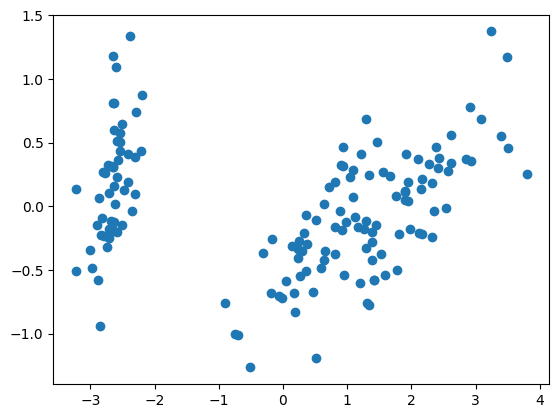

In [10]:
plt.scatter(pca_scale[:,0],pca_scale[:,1])

In [11]:
import scipy.cluster.hierarchy as s 

Text(0, 0.5, 'distance')

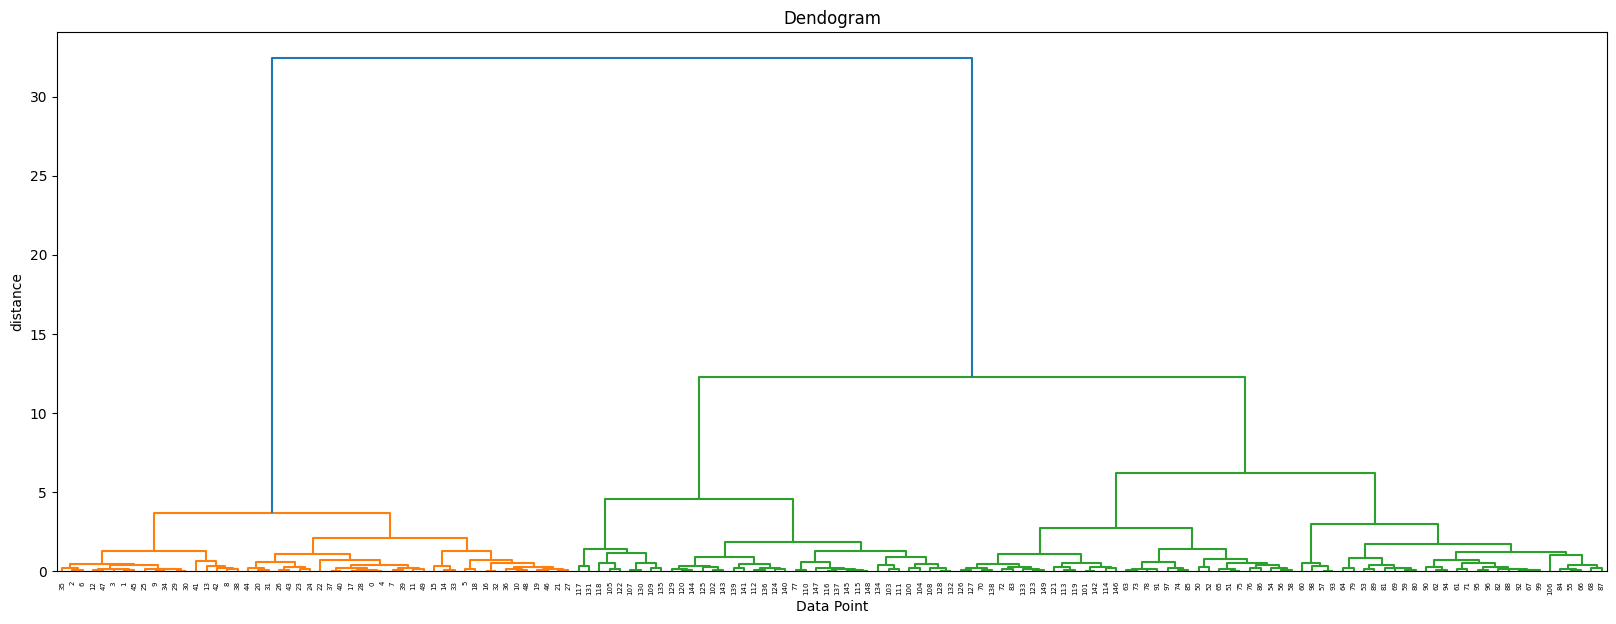

In [12]:
plt.figure(figsize=(20,7))
plt.title('Dendogram')
s.dendrogram(s.linkage(pca_scale,method='ward'))
plt.xlabel('Data Point')
plt.ylabel('distance')

In [13]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
alg = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [21]:
alg.fit(pca_scale)

AgglomerativeClustering(affinity='euclidean')

In [22]:
alg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

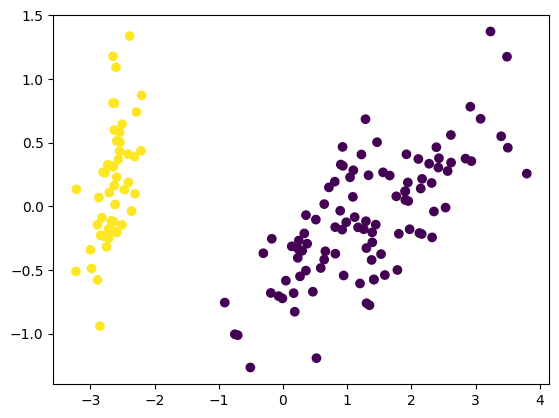

In [23]:
plt.scatter(pca_scale[:,0],pca_scale[:,1],c=alg.labels_)

In [24]:
from sklearn.metrics import silhouette_score


In [25]:
silhouette_score(pca_scale,alg.labels_)

0.7112353733237211

In [26]:
error = []

for i in range(2,10):
    alg = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
    alg.fit(pca_scale)
    score = silhouette_score(pca_scale,alg.labels_)
    error.append(score)

In [27]:
error

[0.7112353733237211,
 0.598475035370544,
 0.5409772344736486,
 0.5487843719847738,
 0.4327647349471996,
 0.4336098852001215,
 0.4332936590632029,
 0.4019535666307192]

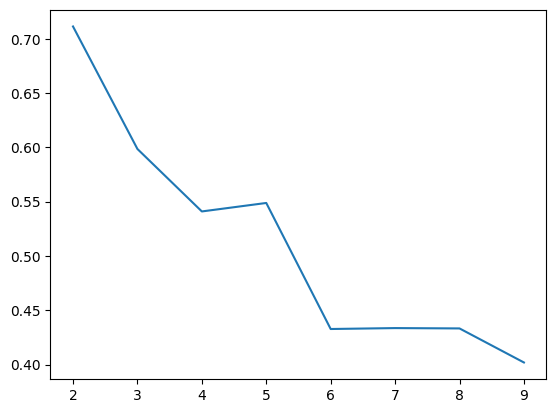

In [28]:
plt.plot(range(2,10),error)